In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import linearRegression_1
import math
import random

from mcmc import mcmc
import densities
import my_problemLR
from numpy import linalg as lg

%matplotlib notebook


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### LEAST SQUARED METHOD 

In [9]:
# create artificial data
n = 100
x=np.random.rand(n)
# We want to guess the slope + intercept of the line of equation y=a*x+b
a=2.
b=1.
y = a*x + b + np.random.randn(n)*0.1

In [15]:
x2 = np.array(list(x))
y2 = np.array(list(y))
# plt.figure()
slopes = []
intercepts = []

iters = 1000



for i in range(iters):
    pop = np.random.randint(0,len(x) , size=math.ceil(len(x2)/10))
    x3 = np.delete(x2, pop)
    y3 = np.delete(y2, pop)
    add = np.random.randint(0, len(x3), size = len(x2)-len(x3))
    
    x3 = np.append(x3, x3[add])
    y3 = np.append(y3, y3[add])
    
    # sol=minimize(fun=mycost, x0=np.zeros(2,), args=(x,y, 1), method='Nelder-Mead')

    def getGMatrix(x,order):

        N=len(x)
        G=np.ones((N,order+1))

        for i in range(0,order):

            G[:,i]=x**float(order-i)


        return G

    G=getGMatrix(x3,1)
    Gt=G.transpose()
    rhs=np.matmul(Gt,y3) 
    lhs=np.matmul(Gt,G)
    m=lg.solve(lhs,rhs)
    
    slopes.append(m[0])
    intercepts.append(m[1])
    
    # plt.subplot(121)
    # plt.hist(x3, color='black', alpha=0.1)
    # plt.scatter(i, np.nanmean(x3))
    # plt.subplot(122)
    # plt.hist(y3, color='black', alpha=0.1)
    # plt.scatter(i, np.nanmean(y3))

print(np.mean(y3 - y),
np.mean(x3 - x))
#plt.figure()
#plt.plot(x3,y3, '.')
#plt.plot(x,y, '.')

0.01108055221871296 0.0019328832759708736


<IPython.core.display.Javascript object>


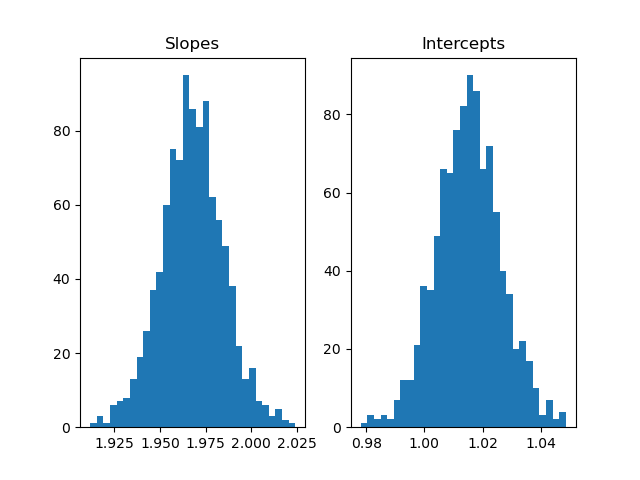

Slope standard deviation: 0.017 , mean : 1.968
Intercept standard deviation: 0.011 , mean : 1.015


In [16]:
plt.figure()
plt.subplot(121)
plt.hist(slopes, bins=int(np.sqrt(iters)))
plt.title('Slopes')
plt.subplot(122)
plt.hist(intercepts, bins=int(np.sqrt(iters)))
plt.title('Intercepts')
print('Slope standard deviation: %.3f' % np.std(slopes), ', mean : %.3f' % np.mean(slopes))
print('Intercept standard deviation: %.3f' % np.std(intercepts), ', mean : %.3f' % np.mean(intercepts))
# plt.savefig('../Output/Hist_LQ.png')

### MCMC METHOD 

In [17]:
def MCMC(ind, xt, yt):
    # parameters for the problem
    Npoint = 100

    # data abscissa {Xi}
    my_problemLR.Xi = xt
    my_problemLR.sigmad = 0.1 # sec

    slope = 2.
    intercept = 1.

    #  Data value = {Yi}
    my_problemLR.Yi = yt
    X0 = np.array([10., 10.])
    # set the step Dernier param : 'Gaus' ou autre
    step = np.array([0.01, 0.01])# *2 or *5 or *10

    niter = 100000


    mout, mMAP, accrate = mcmc(my_problemLR.logprior, my_problemLR.loglikelyhood,
                               densities.generate, densities.logproposal, X0, niter, step, ind)
    x=mout[:,0]
    y=mout[:,1]

    burning_period = int(0.2*niter)
    a = mout[burning_period:-1,0]
    b = mout[burning_period:-1,1]

    a=a[0:-1:200]
    b=b[0:-1:200]
    return a,b

In [18]:
Tot = ['Gaus', 'Exp']
t = []
for i in Tot:
    t.append(MCMC(i, x, y))

Distribution not implemented
Distribution not implemented


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [ ]:
ag, bg = t[0]
ae, be = t[1]
n = len(ae)

In [ ]:
plt.figure()
plt.subplot(121)
plt.hist(ag, bins=int(np.sqrt(n)))
plt.title('Slope')
plt.subplot(122)
plt.hist(bg, bins=int(np.sqrt(n)))
plt.title('Intercept')
print('Slope standard deviation: %.3f' % np.std(ag), ' ,mean: %.3f'% np.mean(ag))
print('Intercept standard deviation: %.3f' % np.std(bg), ' ,mean: %.3f'% np.mean(bg))
plt.savefig('../Output/Hist_gauss.png')

<IPython.core.display.Javascript object>


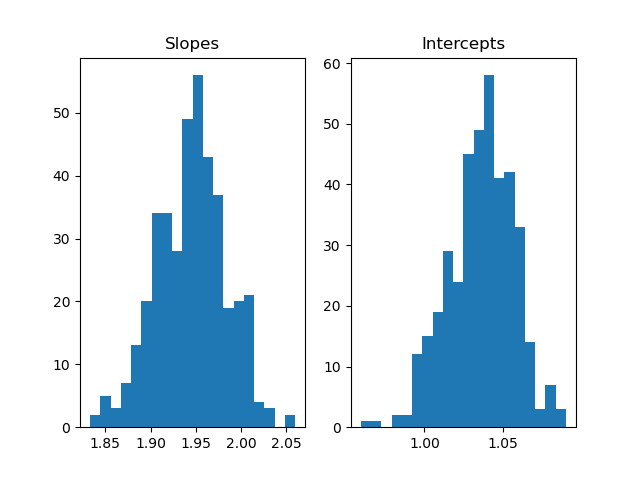

Slope standard deviation: 0.039  ,mean: 1.945
Intercept standard deviation: 0.021  ,mean: 1.036


In [53]:
plt.figure()
plt.subplot(121)
plt.hist(ae, bins=int(np.sqrt(n)))
plt.title('Slopes')
plt.subplot(122)
plt.hist(be, bins=int(np.sqrt(n)))
plt.title('Intercepts')
print('Slope standard deviation: %.3f' % np.std(ae), ' ,mean: %.3f'% np.mean(ae))
print('Intercept standard deviation: %.3f' % np.std(be), ' ,mean: %.3f'% np.mean(be))

# plt.savefig('../Output/Hist_exp.png')

In [54]:
SLOP = [slopes, ag, ae]
INTER = [intercepts, bg, be]
labels = ['Least square', 'Gaussian','Exponential']

<IPython.core.display.Javascript object>


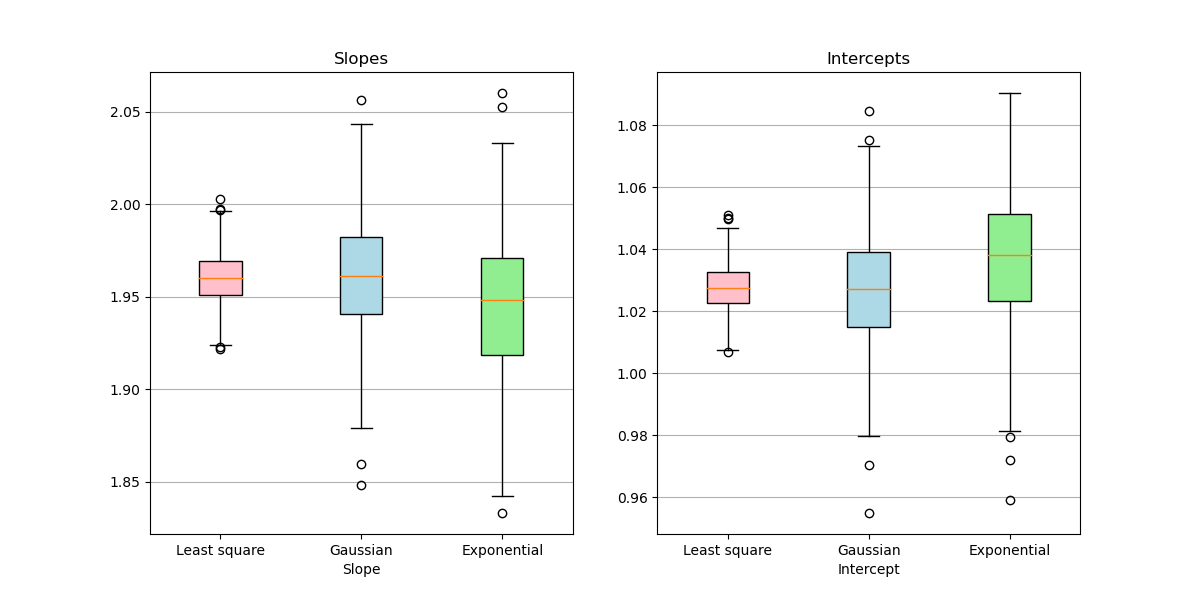

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# rectangular box plot
bplot1 = axes[0].boxplot(SLOP,
                         vert=True,  
                         patch_artist=True, 
                         labels=labels)  
axes[0].set_title('Slopes')


bplot2 = axes[1].boxplot(INTER,
                         vert=True, 
                         patch_artist=True,
                         labels=labels) 
axes[1].set_title('Intercepts')

colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ind,ax in enumerate(axes):
    ax.yaxis.grid(True)
    if ind == 0:
        ax.set_xlabel('Slope')
    else:
        ax.set_xlabel('Intercept')

plt.show()
fig.savefig('../Output/Tot.png')